In [ ]:
pip list

In [ ]:
!pip install textblob
!pip install vader
!pip install nltk
!pip install seaborn


In [ ]:
%pip install textblob

## 1. Data preprocessing & Exploration

In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob, Word
from textblob import download_corpora
download_corpora.main()
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.classify import NaiveBayesClassifier
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score ,StratifiedGroupKFold 
from sklearn.metrics import make_scorer, f1_score
from statistics import mean, stdev
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import confusion_matrix
import seaborn as sns




Finished.


[nltk_data] Downloading package brown to /home/azureuser/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/azureuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [2]:

nltk.download([
     "names",
     "stopwords",
     "state_union",
     "punkt",
     "vader_lexicon",
     "wordnet"
 ])


[nltk_data] Downloading package names to /home/azureuser/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package punkt to /home/azureuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df  = pd.read_csv("azureml://subscriptions/12bff779-b72d-4fce-a847-761da245209b/resourcegroups/Capstone_project_rg/workspaces/Capstone_project_ws/datastores/workspaceblobstore/paths/UI/2024-03-01_153350_UTC/amazon_fine_food_reviews.csv", encoding="utf-8")
df.shape

(568454, 10)

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.isnull().sum()


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
df.drop_duplicates(subset=["UserId","Time","Text"],inplace=True)

In [7]:
#Removing missing values
df_cleaned=df
df_cleaned.dropna(subset = ['Summary'], inplace=True)


In [8]:
df.shape

(393889, 10)

In [9]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    0
Text                       0
dtype: int64

In [10]:
df_cleaned

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


##### Helpfulness numerator should always be less than helpfulness denominator

The helpful numerator is the number of users who found the review helpful. The helpfulness denominator is the number of users whether they found the review useful or not.

In [11]:
reviews = df_cleaned[df_cleaned["HelpfulnessNumerator"]<=df_cleaned["HelpfulnessDenominator"]]

In [12]:
reviews.shape

(393887, 10)

 ### #score distribution

In [13]:
reviews.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    0
Text                       0
dtype: int64

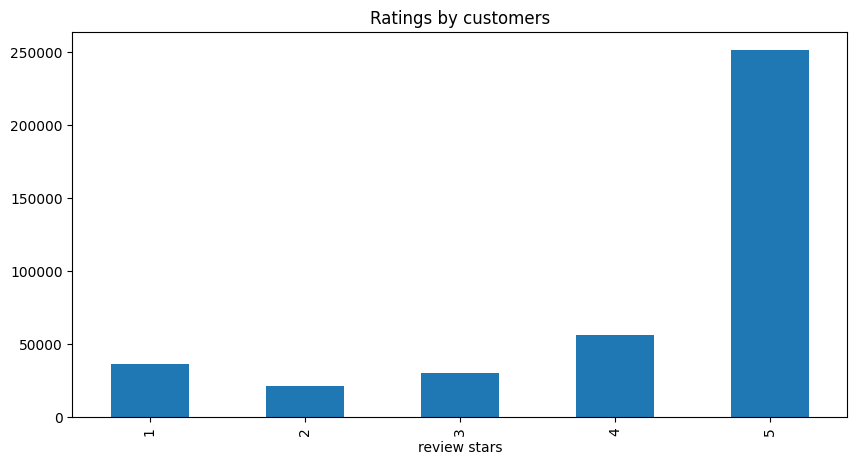

In [14]:
ax=reviews['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Ratings by customers',
                                                  figsize=(10,5))
ax.set_xlabel('review stars')
plt.show()

In [15]:
ax

<Axes: title={'center': 'Ratings by customers'}, xlabel='review stars'>

In [16]:
reviews_text = reviews["Text"]
reviews_text.shape

(393887,)

In [17]:
reviews_text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

#### Pre-processing: removing html tags 

In [18]:
import re 
snow_stemmer = nltk.stem.SnowballStemmer(language="english")
for index, row in reviews.iterrows():
   clean = re.compile('<.*?>')
    
    # Convert the content of the "Text" column to a string
   cleaned_sentence = re.sub(clean, " ", str(row['Text']))
    
    # Update the "Text" column with the cleaned sentence
   reviews.at[index, 'Text'] = cleaned_sentence
 
reviews.head(2) 

def clean_text(s):
    # lower()
    s = re.sub(r'<.+?>', '', s).strip()

    return s



In [19]:
df['Text']=df['Text'].apply(clean_text)

In [20]:
summary_text = reviews["Summary"]

In [21]:
type(reviews['Text'][0])

str

In [22]:
reviews.shape

(393887, 10)

# Text classification

## Feature engineering

#### sentiment polarity determining using vader

In [23]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment for a given review
def analyze_sentiment(review):
    scores = sia.polarity_scores(review)
    compound_score = scores['compound']
    return compound_score

# Apply sentiment analysis to each text
reviews_with_sentiment = reviews.assign(Sentiment_Vader=reviews_text.apply(analyze_sentiment))
#sentiment analysis text on summary

reviews_with_sentiments = reviews_with_sentiment.assign(Sentiment_summary_Vader=summary_text.apply(analyze_sentiment))



In [24]:
reviews_with_sentiments = reviews_with_sentiment.assign(Sentiment_summary_Vader=summary_text.apply(analyze_sentiment))

In [25]:
reviews_with_sentiments.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Vader,Sentiment_summary_Vader
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,0.4404
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,0.0000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265,0.0000
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,0.6249


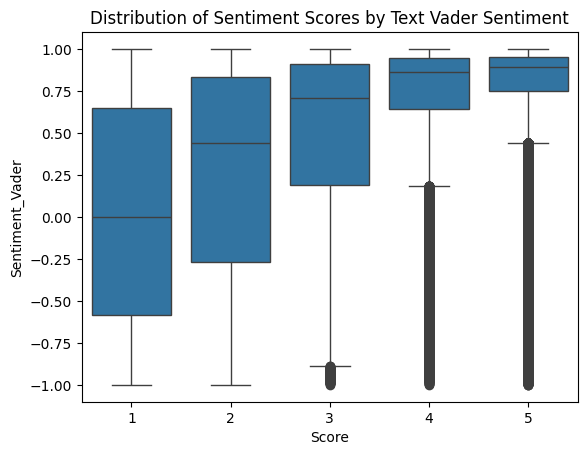

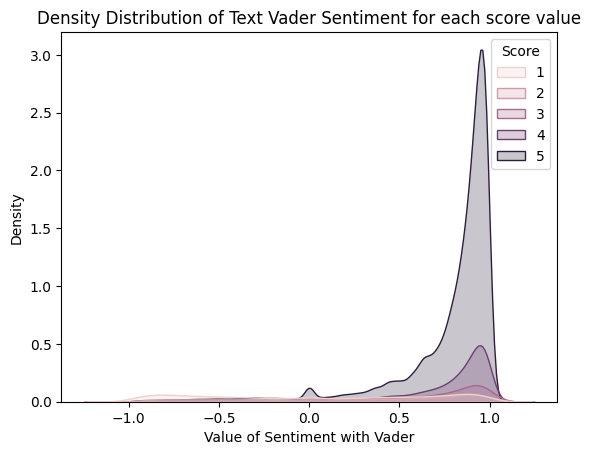

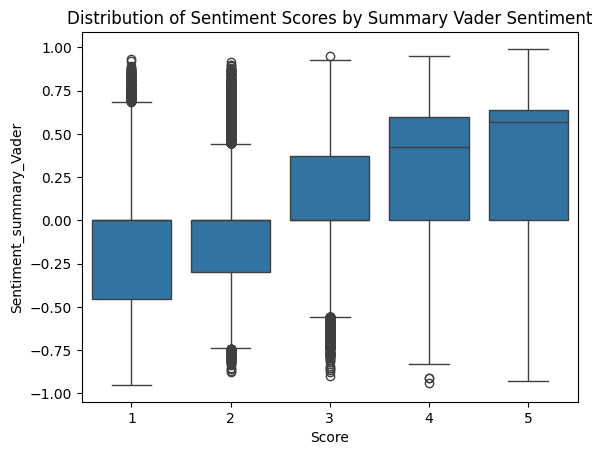

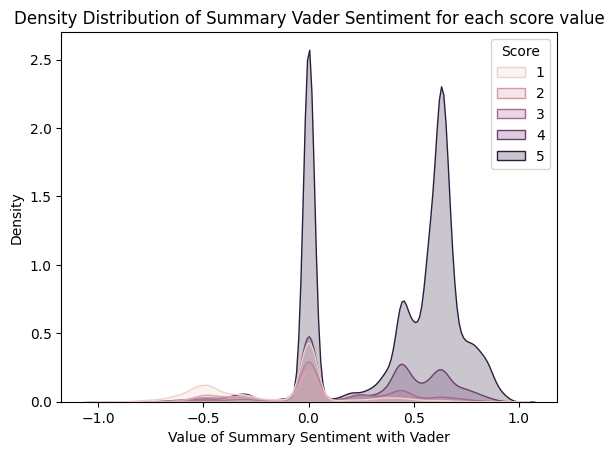

In [26]:
# FOR TEXT---------------------------
    #Box-plot for check Text Vader Sentiment over scores
sns.boxplot(data=reviews_with_sentiments, x="Score", y="Sentiment_Vader").set(title='Distribution of Sentiment Scores by Text Vader Sentiment')
plt.show()

    ##KDE-plot for check Text Vader Sentiment over scores
sns.kdeplot(data=reviews_with_sentiments, x="Sentiment_Vader", hue="Score",fill=True)
plt.xlabel("Value of Sentiment with Vader")
plt.ylabel("Density")
plt.title("Density Distribution of Text Vader Sentiment for each score value")
plt.show()

    #FOR SUMMARY
    #Box-plot for check Summary Vader Sentiment over scores
sns.boxplot(data=reviews_with_sentiments, x="Score", y="Sentiment_summary_Vader").set(title='Distribution of Sentiment Scores by Summary Vader Sentiment')
plt.show()

    ##KDE-plot for check Summary Vader Sentiment over scores
sns.kdeplot(data=reviews_with_sentiments, x="Sentiment_summary_Vader", hue="Score",fill=True)
plt.xlabel("Value of Summary Sentiment with Vader")
plt.ylabel("Density")
plt.title("Density Distribution of Summary Vader Sentiment for each score value")
plt.show()

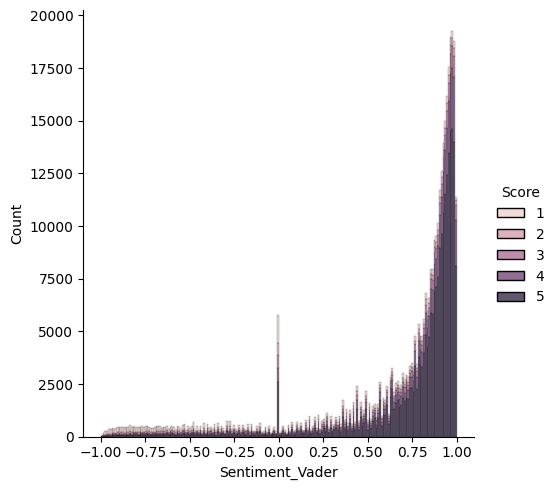

In [27]:
sns.displot(data=reviews_with_sentiments, x="Sentiment_Vader", hue="Score", multiple="stack")
plt.show()

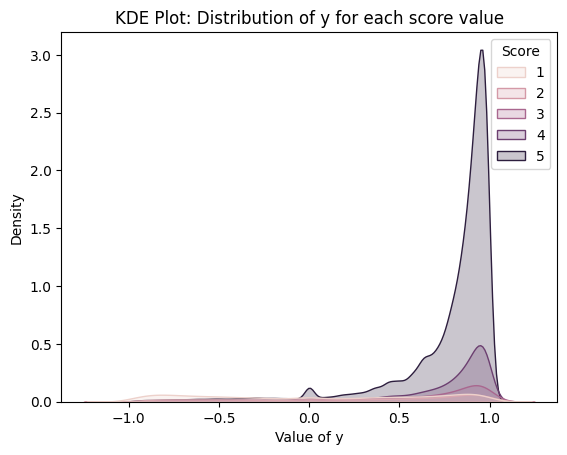

In [28]:
sns.kdeplot(data=reviews_with_sentiments, x="Sentiment_Vader", hue="Score", fill=True)
plt.xlabel("Value of y")
plt.ylabel("Density")
plt.title("KDE Plot: Distribution of y for each score value")
plt.show()

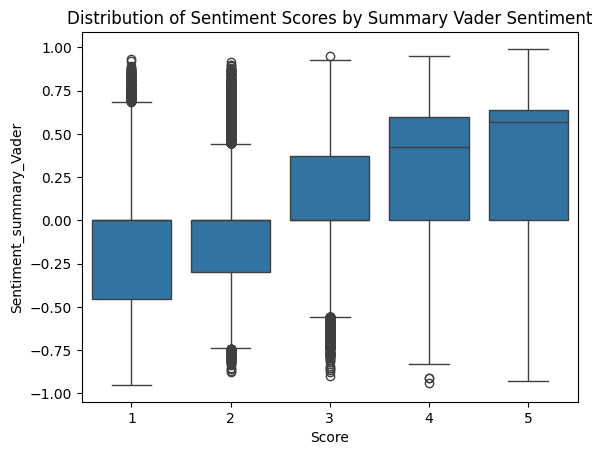

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=reviews_with_sentiments, x="Score", y="Sentiment_summary_Vader").set(title='Distribution of Sentiment Scores by Summary Vader Sentiment')
plt.show()

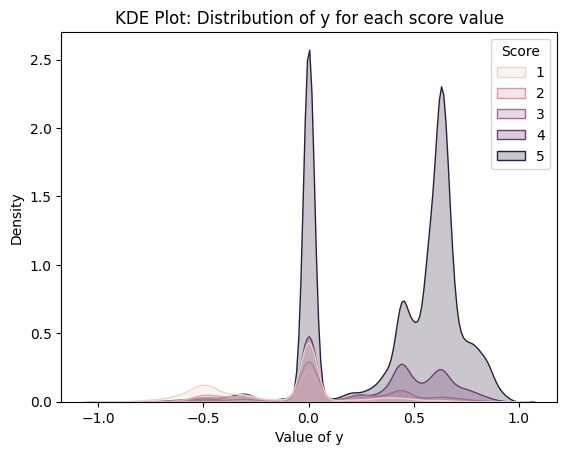

In [30]:
sns.kdeplot(data=reviews_with_sentiments, x="Sentiment_summary_Vader", hue="Score", fill=True)
plt.xlabel("Value of y")
plt.ylabel("Density")
plt.title("KDE Plot: Distribution of y for each score value")
plt.show()

### Sentiment analysis using textblob

In [31]:
from textblob import TextBlob

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

reviews_with_sentiments2 = reviews_with_sentiments.assign(Sentiment_Textblob=reviews_text.apply(getPolarity))
reviews_with_sentiments3 = reviews_with_sentiments2.assign(Sentiment_summary_Textblob=summary_text.apply(getPolarity))
reviews_sentiments_subjectivity = reviews_with_sentiments3.assign(Subjectivity=reviews_text.apply(getSubjectivity))



In [32]:
reviews_sentiments_subjectivity.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Sentiment_Vader', 'Sentiment_summary_Vader', 'Sentiment_Textblob',
       'Sentiment_summary_Textblob', 'Subjectivity'],
      dtype='object')

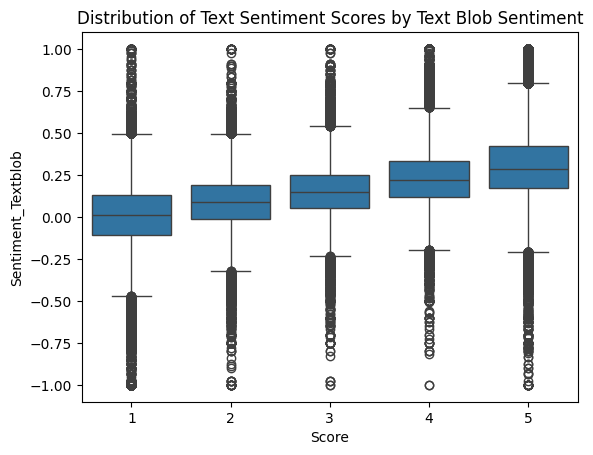

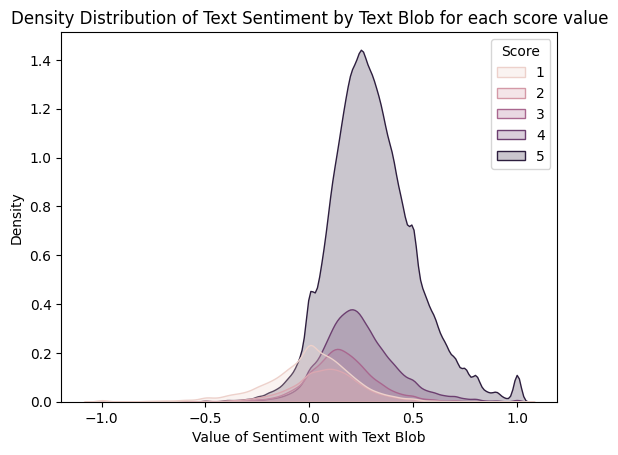

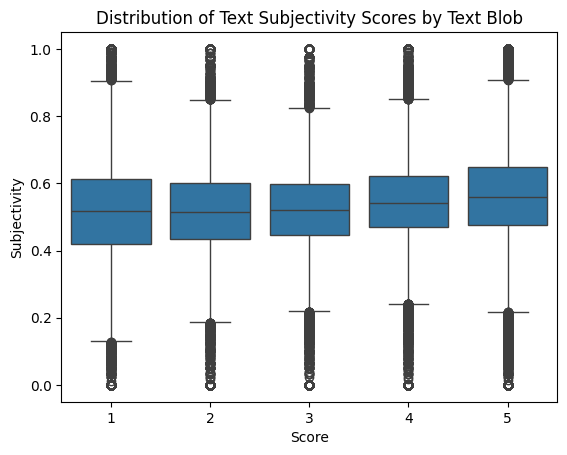

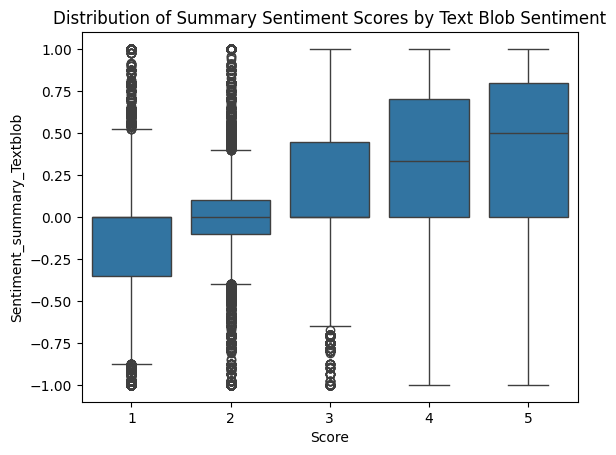

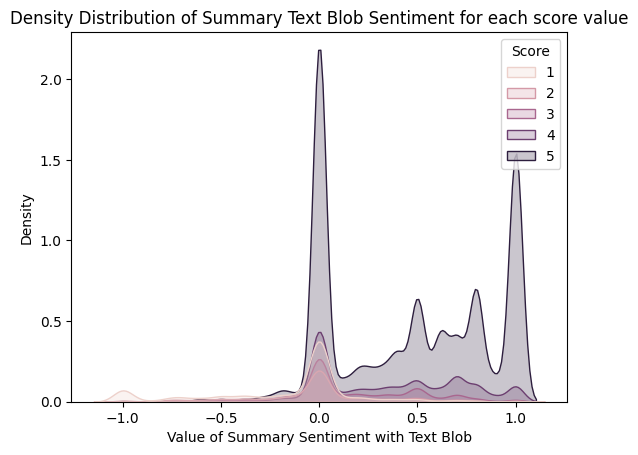

In [33]:
sns.boxplot(data=reviews_sentiments_subjectivity, x="Score", y="Sentiment_Textblob").set(title='Distribution of Text Sentiment Scores by Text Blob Sentiment')
plt.show()

##KDE-plot for check Text Blob text Sentiment over scores
sns.kdeplot(data=reviews_sentiments_subjectivity, x="Sentiment_Textblob", hue="Score",fill=True)
plt.xlabel("Value of Sentiment with Text Blob")
plt.ylabel("Density")
plt.title("Density Distribution of Text Sentiment by Text Blob for each score value")
plt.show()

#Box-plot for check Text Blob text subjectivity over scores
sns.boxplot(data=reviews_sentiments_subjectivity, x="Score", y="Subjectivity").set(title='Distribution of Text Subjectivity Scores by Text Blob')
plt.show()

#FOR SUMMARY
#Box-plot for check Summary Text Blob Sentiment over scores
sns.boxplot(data=reviews_sentiments_subjectivity, x="Score", y="Sentiment_summary_Textblob").set(title='Distribution of Summary Sentiment Scores by Text Blob Sentiment')
plt.show()

 ##KDE-plot for check Summary Text Blob Sentiment over scores
sns.kdeplot(data=reviews_sentiments_subjectivity, x="Sentiment_summary_Textblob", hue="Score",fill=True)
plt.xlabel("Value of Summary Sentiment with Text Blob")
plt.ylabel("Density")
plt.title("Density Distribution of Summary Text Blob Sentiment for each score value")
plt.show()

In [34]:
reviews_sentiments_subjectivity

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Vader,Sentiment_summary_Vader,Sentiment_Textblob,Sentiment_summary_Textblob,Subjectivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,0.4404,0.450000,0.70,0.433333
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,0.0000,-0.033333,0.00,0.762963
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265,0.0000,0.133571,0.00,0.448571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000,0.0000,0.166667,0.00,0.533333
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,0.6249,0.483333,0.80,0.637500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.8589,0.0000,0.365000,0.00,0.605000
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-0.4848,-0.4767,-0.208333,-0.75,0.408333
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",0.4352,0.5719,-0.021875,1.00,0.418750
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,0.9717,0.8555,0.517857,0.50,0.678571


##### create helpful column = helpfulNumeretor/helpfulDenominator

In [35]:
reviews_sentiments_subjectivity_helpful = reviews_sentiments_subjectivity.copy()  
reviews_sentiments_subjectivity_helpful['Helpful'] = reviews_sentiments_subjectivity_helpful['HelpfulnessNumerator'] / reviews_sentiments_subjectivity_helpful['HelpfulnessDenominator']


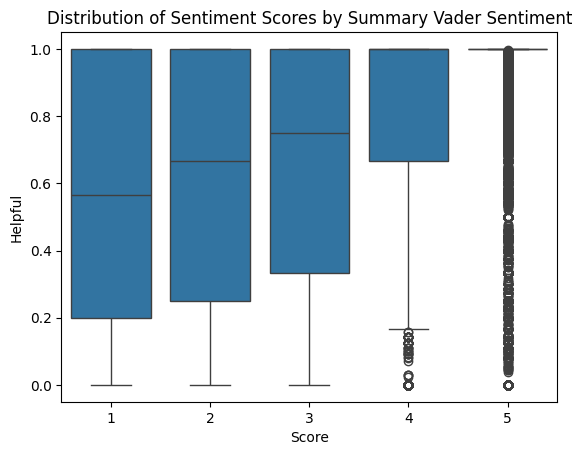

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=reviews_sentiments_subjectivity_helpful, x="Score", y="Helpful").set(title='Distribution of Sentiment Scores by Summary Vader Sentiment')
plt.show()

##### Create column length as feature

In [37]:
reviews_sentiments_subjectivity_helpful["Text_length"] = reviews_sentiments_subjectivity_helpful["Text"].apply(len)

In [38]:
reviews_sentiments_subjectivity_helpful.isna().sum()

Id                                 0
ProductId                          0
UserId                             0
ProfileName                       16
HelpfulnessNumerator               0
HelpfulnessDenominator             0
Score                              0
Time                               0
Summary                            0
Text                               0
Sentiment_Vader                    0
Sentiment_summary_Vader            0
Sentiment_Textblob                 0
Sentiment_summary_Textblob         0
Subjectivity                       0
Helpful                       184611
Text_length                        0
dtype: int64

In [39]:
reviews_sentiments_subjectivity_helpful.Helpful.fillna(0,inplace=True)

In [40]:
reviews_sentiments_subjectivity_helpful

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Vader,Sentiment_summary_Vader,Sentiment_Textblob,Sentiment_summary_Textblob,Subjectivity,Helpful,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,0.4404,0.450000,0.70,0.433333,1.0,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,0.0000,-0.033333,0.00,0.762963,0.0,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265,0.0000,0.133571,0.00,0.448571,1.0,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000,0.0000,0.166667,0.00,0.533333,1.0,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,0.6249,0.483333,0.80,0.637500,0.0,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.8589,0.0000,0.365000,0.00,0.605000,0.0,149
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-0.4848,-0.4767,-0.208333,-0.75,0.408333,0.0,252
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",0.4352,0.5719,-0.021875,1.00,0.418750,1.0,372
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,0.9717,0.8555,0.517857,0.50,0.678571,1.0,200


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


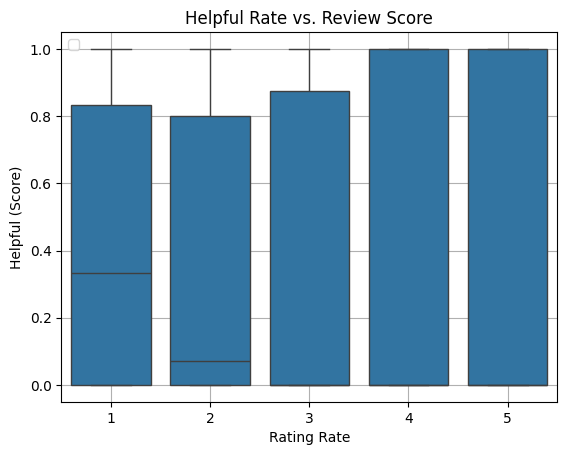

In [41]:
#Create a scatter plot
sns.boxplot(data=reviews_sentiments_subjectivity_helpful, x="Score", y="Helpful")
plt.xlabel('Rating Rate')
plt.ylabel('Helpful (Score)')
plt.title('Helpful Rate vs. Review Score')
plt.grid(True)
plt.legend()
plt.show()

# Sentiment classification

In [42]:
reviews_sentiments_subjectivity_helpful.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Sentiment_Vader', 'Sentiment_summary_Vader', 'Sentiment_Textblob',
       'Sentiment_summary_Textblob', 'Subjectivity', 'Helpful', 'Text_length'],
      dtype='object')

In [67]:
X = reviews_sentiments_subjectivity_helpful[['Sentiment_Vader', 'Sentiment_summary_Vader', 'Sentiment_Textblob',
       'Sentiment_summary_Textblob', 'Subjectivity', 'Helpful', 'Text_length']]
y = reviews_sentiments_subjectivity_helpful.Score


<Axes: >

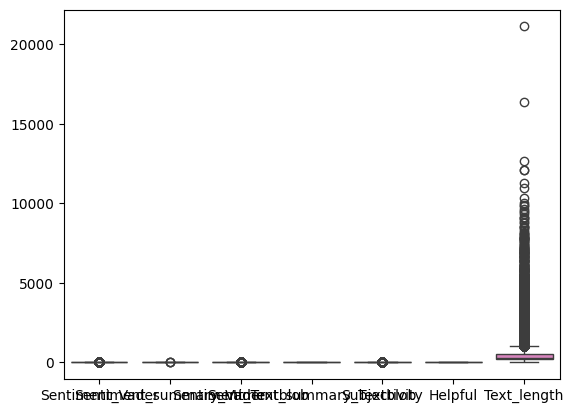

In [44]:

sns.boxplot(data=X)

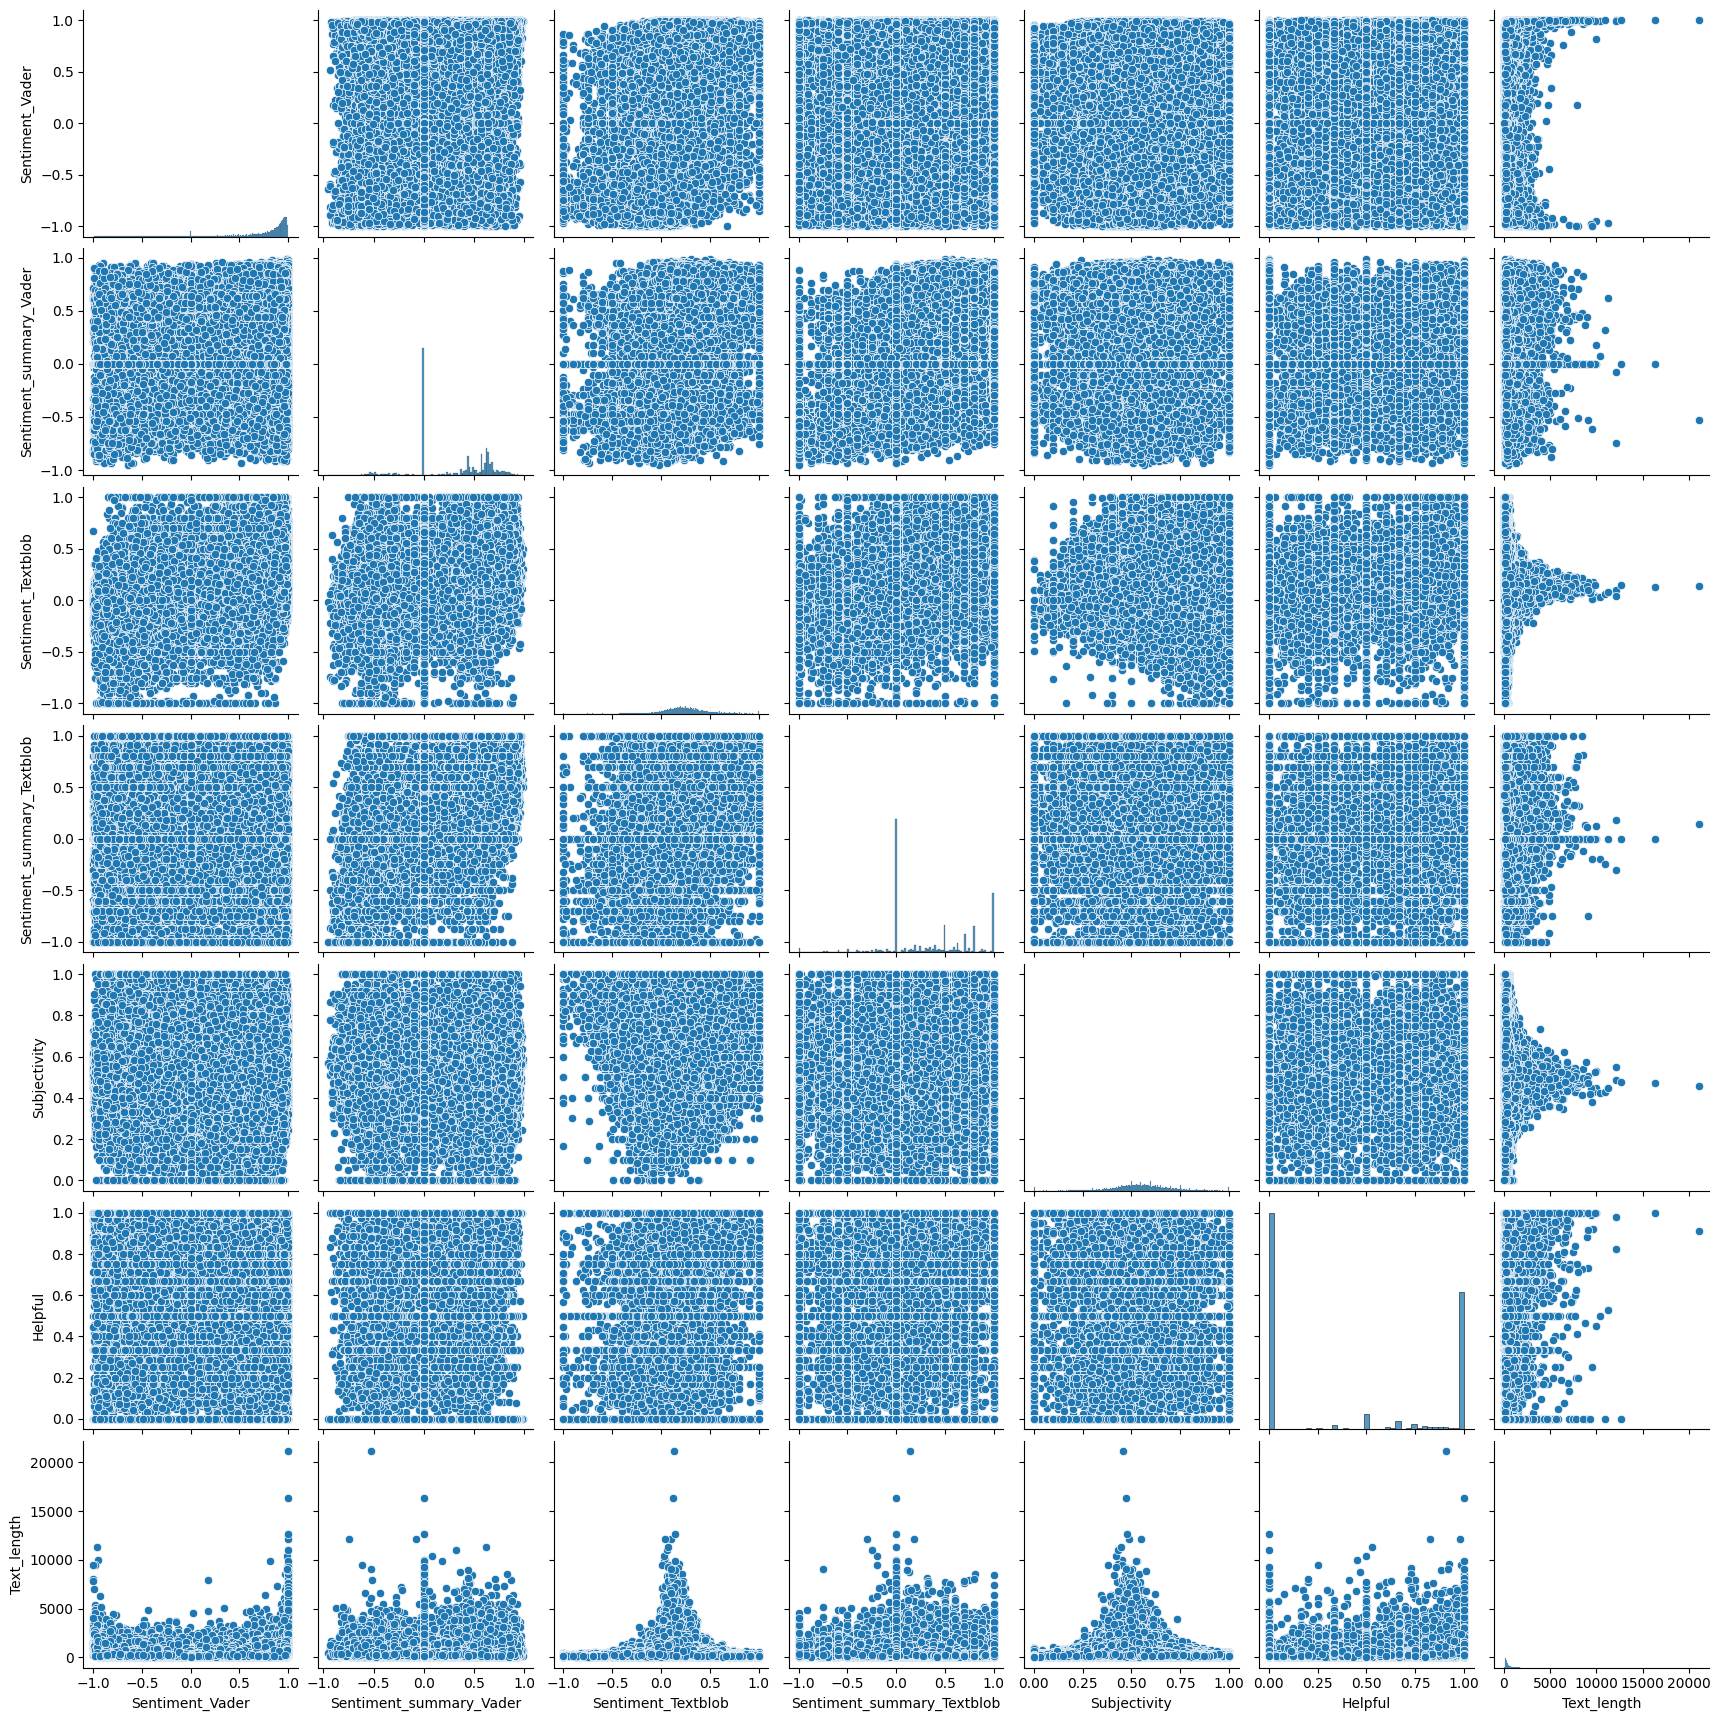

In [45]:
sns.pairplot(X)

<Axes: >

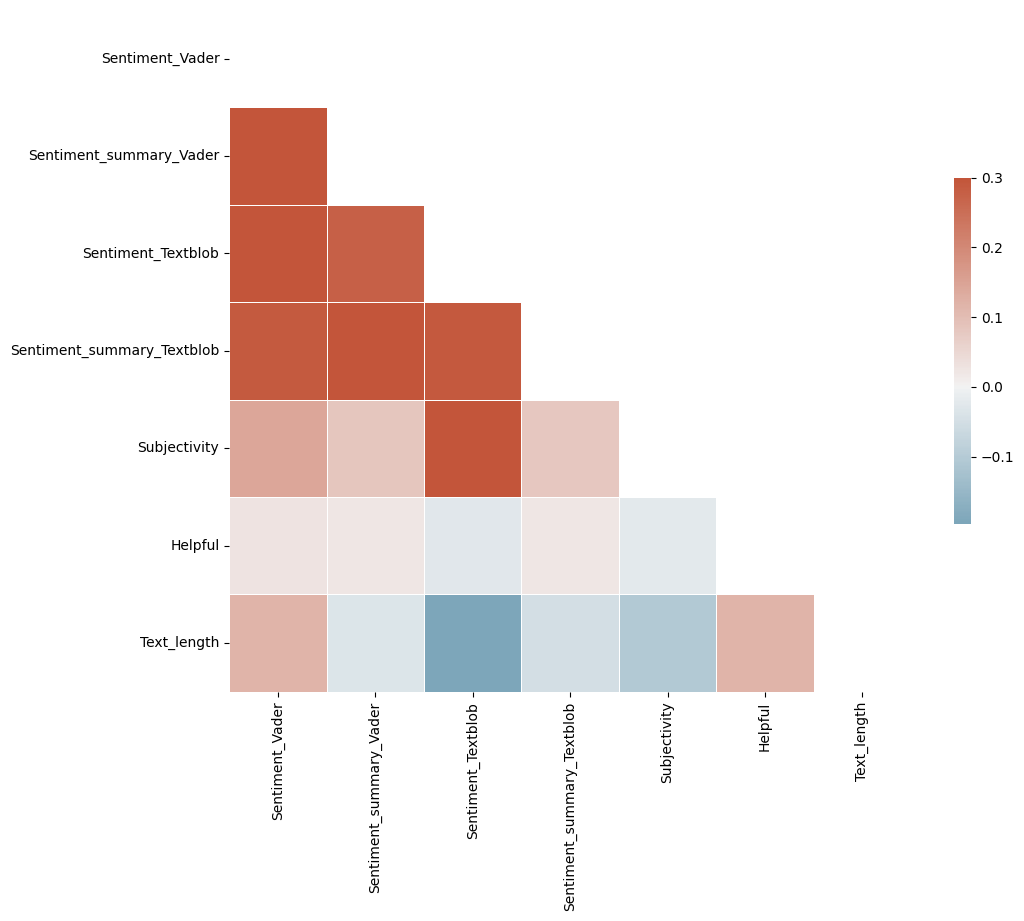

In [46]:
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:
y

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 393887, dtype: int64

#### Scale data and encode y


In [48]:
X.columns

Index(['Sentiment_Vader', 'Sentiment_summary_Vader', 'Sentiment_Textblob',
       'Sentiment_summary_Textblob', 'Subjectivity', 'Helpful', 'Text_length'],
      dtype='object')

In [49]:
# To Play with columns
# ['Sentiment_Vader', 'Sentiment_Textblob', 'Sentiment_summary_Vader','Sentiment_summary_Textblob', 'Subjectivity', 'Helpful', 'Text_length']

X=X[['Sentiment_Vader', 'Sentiment_Textblob', 'Sentiment_summary_Vader','Sentiment_summary_Textblob', 'Subjectivity', 'Helpful', 'Text_length']]

In [68]:

from sklearn.preprocessing import LabelBinarizer
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3 ,random_state=99,stratify=y)



lb = LabelBinarizer()
y=y_train
y_train = lb.fit_transform(y_train)
#y_test = lb.fit_transform(y_test)




In [52]:
y_train

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [53]:
X_scaled.shape

(393887, 7)

### Gaussian Naive-Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(var_smoothing=1e-15)


# Création de l'objet StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
lst_f1_train = []
lst_f1_test = []

for train_index, test_index in skf.split(X_train, y):
    x_train_fold, x_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    #X_scaled.shape
    #y_binaire.shape
    model.fit(x_train_fold, y_train_fold)
    
  
    f1_train = f1_score(y_train_fold, model.predict(x_train_fold), average='weighted')
    f1_test = f1_score(y_test_fold, model.predict(x_test_fold), average='weighted')

    
    lst_f1_train.append(f1_train)
    lst_f1_test.append(f1_test)

# Displaying results
print('\nF1 scores on training set:', lst_f1_train)
print('\nF1 scores on test set:', lst_f1_test)
print('\nMean F1 score on training set:', mean(lst_f1_train))
print('Mean F1 score on test set:', mean(lst_f1_test))
print('\nStandard deviation of F1 scores on training set:', stdev(lst_f1_train))
print('Standard deviation of F1 scores on test set:', stdev(lst_f1_test))


F1 scores on training set: [0.5917889148888966, 0.5914003393004326, 0.5893249013293791]

F1 scores on test set: [0.5926989640218775, 0.5888195238350299, 0.5913814879160819]

Mean F1 score on training set: 0.5908380518395694
Mean F1 score on test set: 0.5909666585909964

Standard deviation of F1 scores on training set: 0.0013247513339696999
Standard deviation of F1 scores on test set: 0.0019727079275820843


In [70]:
from sklearn.metrics import classification_report
y_pred_1=model.predict(X_test)

print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           1       0.45      0.67      0.54     10891
           2       0.18      0.02      0.03      6240
           3       0.19      0.14      0.16      8930
           4       0.25      0.02      0.04     16826
           5       0.74      0.92      0.82     75280

    accuracy                           0.66    118167
   macro avg       0.36      0.35      0.32    118167
weighted avg       0.57      0.66      0.59    118167



### Random Forest

In [64]:

#model = RandomForestClassifier(n_estimators=100, max_depth=10)
model =RandomForestClassifier(n_estimators=100, max_depth=8,
min_samples_split = 4)
# StratifiedKFold object creation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_f1_train = []
lst_f1_test = []

for train_index, test_index in skf.split(X_train, y):
    x_train_fold, x_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    model.fit(x_train_fold, y_train_fold)
   
 
    f1_train = f1_score(y_train_fold, model.predict(x_train_fold), average='weighted')
    f1_test = f1_score(y_test_fold, model.predict(x_test_fold), average='weighted')
 
   
    lst_f1_train.append(f1_train)
    lst_f1_test.append(f1_test)
 
# Displaying results
print('\nF1 scores on training set:', lst_f1_train)
print('\nF1 scores on test set:', lst_f1_test)
print('\nMean F1 score on training set:', mean(lst_f1_train))
print('Mean F1 score on test set:', mean(lst_f1_test))
print('\nStandard deviation of F1 scores on training set:', stdev(lst_f1_train))
print('Standard deviation of F1 scores on test set:', stdev(lst_f1_test))


F1 scores on training set: [0.5793736819400491, 0.5799730090048018, 0.5793266788482625, 0.5805514315552911, 0.5802137590416668, 0.5804931835966038, 0.581004280387928, 0.5790237090614201, 0.5776563933907595, 0.5791619354395862]

F1 scores on test set: [0.577375129709089, 0.5775989408544618, 0.5787300681345625, 0.5780055603364171, 0.5758102482455685, 0.5782943148624586, 0.5800076369712974, 0.5785683096176347, 0.58044196511894, 0.5781092537441287]

Mean F1 score on training set: 0.5796778062266369
Mean F1 score on test set: 0.5782941427594559

Standard deviation of F1 scores on training set: 0.0009751263685703951
Standard deviation of F1 scores on test set: 0.0013093462374095424


In [65]:
from sklearn.metrics import classification_report
y_pred_1=model.predict(X_test)

print(classification_report(y_test, y_pred_1))




              precision    recall  f1-score   support

           1       0.52      0.63      0.57     10891
           2       0.67      0.00      0.00      6240
           3       0.45      0.02      0.03      8930
           4       0.00      0.00      0.00     16826
           5       0.71      0.98      0.82     75280

    accuracy                           0.68    118167
   macro avg       0.47      0.33      0.29    118167
weighted avg       0.57      0.68      0.58    118167



/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r